In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
node_crates = pd.read_csv("./node_crate.csv")
node_crates.head()

,id,name,in_conn,in_conn_compound,in_conn_complex03,in_conn_complex05,in_conn_complex07,out_conn,attr_version
0,455,cc,1097,47022,3932.791030,8520.851328,16196.125660,1,1.0.72
1,1364,syn,3682,50935,6032.058392,9128.400805,15357.822520,3,1.0.85
2,598,ryu,43,42469,4042.193740,8037.927542,13960.587380,1,1.0.9
3,33126,jobserver,12,47023,1208.700809,4298.113164,11372.783460,1,0.1.24
4,43647,no-panic,8,42479,1226.847723,4038.932032,9793.856936,3,0.1.15


In [3]:
crate_names = node_crates.name.astype(str)
crate_names

0                    cc
1                   syn
2                   ryu
3             jobserver
4              no-panic
              ...      
74850             aconv
74851    act-zero-macro
74852           act-bin
74853           actaeon
74854       actori-cors
Name: name, Length: 74855, dtype: object

In [4]:
col_names = ["in_conn_compound", "in_conn_complex03",
             "in_conn_complex05", "in_conn_complex07"]

In [5]:
def select_top_n(df, sort_by_col, n):
    df = df.sort_values(sort_by_col, ascending=False).head(n)
    return (
        df.name.astype(str),
        [
            (df[col_name].astype(float), col_name) for col_name in col_names
        ]
    )


In [6]:
def show_plot_sort_by(ax, col_name, n=50):

    ax.tick_params(rotation=90)

    ax.set_title(f"Sort by {col_name}")

    (x, cols) = select_top_n(node_crates, col_name, n)
    [ax.plot(x, y, label=col_name) for (y, col_name) in cols]

    ax.legend()


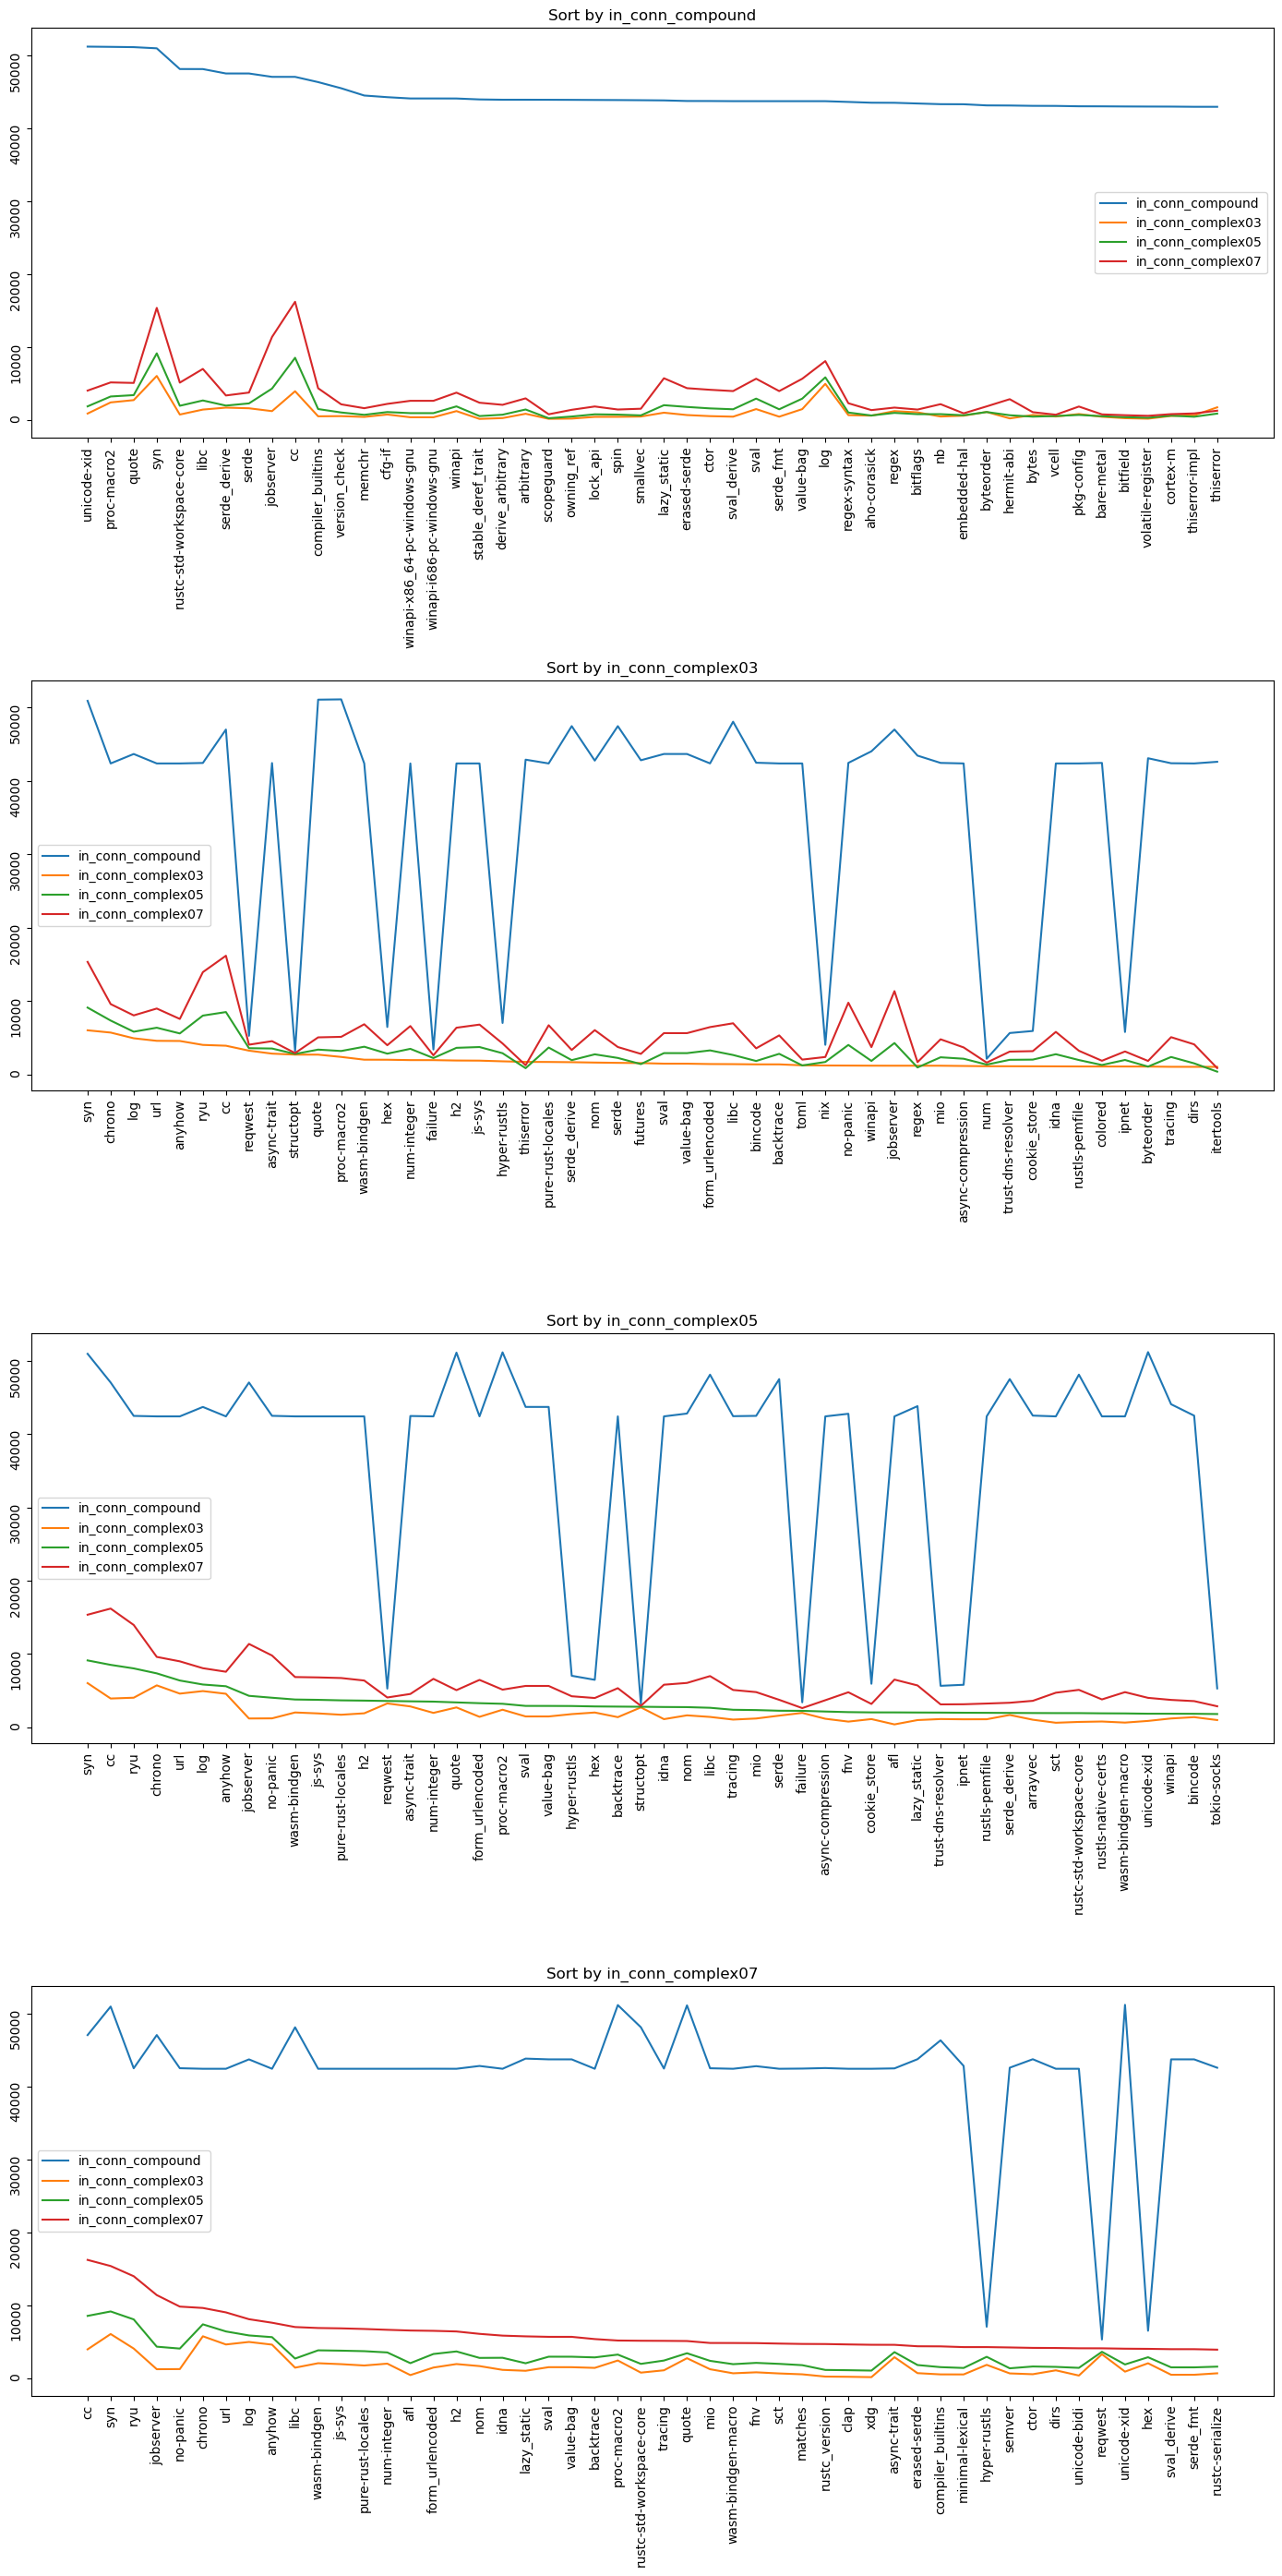

In [7]:
fig, axes = plt.subplots(4, figsize=(14, 28), dpi=100)

for i in range(len(col_names)):
    show_plot_sort_by(axes[i], col_names[i])

fig.tight_layout()